# 1. ВВЕДЕНИЕ

### 1.1. Для начала, пожалуйста, напишите 5 примеров применения  методов ML в жизниTo get started, please write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples?

<b>1. Персонализированная реклама в интернете</b><br>
Класс задачи: классификация.<br>
Польза: пользователи видят более релевантные предложения, компании эффективнее тратят рекламный бюджет.<br>
<b>2. Финансовый сектор: выявление подозрительных фирм и нахождение отклонений от нормального поведения.</b><br>
Класс задачи: Регрессия.<br>
Польза: помогает выявить недобросовестные организации и восполнить недостачу по налогам.<br>
<b>3. Рекомендательные системы (YouTube)</b><br>
Класс задачи: регрессия (оценка вероятности интереса) или классификация (подбор категорий контента).<br>
Польза: персонализированный опыт и экономия времени пользователя.<br>
<b>4. Синтез биологически активных веществ</b><br>
Класс задачи: регрессия.<br>
Польза: в некоторых случаях сложно предсказать биологическую активность вещества без соответствующих анализов, применение ML позволяет по набору физических и химических свойств, а также информации о биологической активности, предсказать наличие или отсутствие биологической активности вещества или даже некоторые свойства.
<b>5. Медицинская диагностика по снимкам (например, рентген, МРТ) или другому набору данных анализов</b><br>
Класс задачи: классификация (здоров или болен болен, тип заболевания).<br>
Польза: помогает врачам быстрее и точнее ставить диагнозы, сужая круг возможных причин заболевания.

### 1.2. Используйте классификацию задач во введении, чтобы решить, какой класс вы можете назначить заданиям из приведенной выше таблицы и 5 приведенных вами примеров.

Для таблицы, представленной в задаче, классом будет являться регрессия, так как предсказывается числовое значение на нерерывном множестве - цена.
Регрессия в предстваленной может быть сведена к классификации, например, через разбитие значений стоимости на группы.<br> Те же классы задач представлены в пяти примерах.

### 1.3. Подумайте о том, в чем разница между мультиклассовой и мультиметкой.

<b>Multiclass (многоклассовая классификация): у объекта только одна метка из нескольких возможных.</b><br>
Применительно в контексту проекта: у каждой квартиры есть только один класс для классификации из нескольких возможных, например, деление на категории по стоимости "за все", деление на категории по "цене за метр квадратный", деление на классы недвижимости ("эконом", "бизнес" и др.). Каждая квартира попадет только в одну категорию, что удобно, когда важна не точность,  а отнесение объекта к какому-либо сегменту рынка/категории.<br>

<b>Multilabel (многометочная классификация): у объекта может быть несколько меток одновременно.</b><br> 
Применительно в контексту проекта: можно классифицировать не только по цене, но и по другим факторам, например, удаленность от центра города, удаленность от метро, наличие обременений, наличие лифта в доме, этаж, на котором располагается квартира. Одна квартира может иметь несколько меток одновременно. Полезно, когда нужно предсказывать сразу несколько характеристик квартиры, а не только одну.

### 1.4. Является ли пример с ценами на жилье из теории классификацией регрессионной задачи? Можно ли свести проблему регрессии к классификации?

Для таблицы, представленной в задаче, классом будет являться регрессия, так как предсказывается числовое значение на нерерывном множестве - цена. Регрессия в предстваленной может быть сведена к классификации, например, через разбитие значений стоимости на группы.

# 2. ВВЕДЕНИЕ В АНАЛИЗ ДАННЫХ

### 2.1. Импортируйте библиотеки pandas, numpy, sklearn, lightgbm, scipy, statsmodels, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import scipy
import statsmodels
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures #LabelEncoder
from sklearn.model_selection import train_test_split

### 2.2 Загрузка данных из Kaggle с помощью pandas

In [2]:
data = pd.read_json("data/train.json")
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


### 2.3. Каков размер (количество строк и столбцов) ваших данных?

In [3]:
_str = data.shape[0] # Первое число - количство строк
_col = data.shape[1] # Второе число - количество столбцов
print(f"Количество строк - {_str}, количество столбцов - {_col}")

Количество строк - 49352, количество столбцов - 15


### 2.4. Распечатайте список столбцов. Какая колонна является целью?

In [4]:
data.columns
#Согласно задаче, целевой является колонна 'price'

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

### 2.5. Проведите быстрый анализ данных: используйте методы *info(), describe(), corr()*. Объясните результаты выходных данных. Есть ли пустые столбцы?

Метод *info()* в библиотеке pandas используется для того, чтобы быстро получить сводку о датафрейме. Используется для быстрого понимания состава данных и поиска пропусков. 
Результаты метода *info()* показывают:

* Общее количество столбцов и строк в DataFrame.
* Индекс колонок и их названия.
* Количество ненулевых значений в каждом столбце.
* Тип данных каждого столбца (integer, float, string и т.д.).
* Общее количество использованной памяти.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Метод *describe()* генерирует описательную статистику по числовым столбцам. Используется для анализа распределения данных и выявления выбросов.
Выходные данные включают такие метрики, как количество, среднее, стандартное отклонение, минимум, максимум и процентили.

In [6]:
data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


Метод *corr()* считает корреляцию между числовыми столбцами. По умолчанию используется коэффициент Пирсона (диапазон [-1; 1]), где
* 1 - сильная положительная связь
* -1 - сильная отрицательная связь
* 0 - связи нет

Используется для поиска взаимосвязей между признаками.

In [7]:
data_num_col = data.describe().columns
data[data_num_col].corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


### 2.6. Мы будем работать только с 3 характеристиками: 'ванные комнаты', 'спальни', 'interest_level' и с целевой колонкой 'цена'. Создайте кадр данных, содержащий только эти столбцы.

In [41]:
data_n = data[['bathrooms', 'bedrooms', 'interest_level', 'price']].copy()
data_n.head()

,bathrooms,bedrooms,interest_level,price
4,1,1,medium,2400
6,1,2,low,3800
9,1,2,medium,3495
10,2,3,medium,3000
15,1,0,low,2795


# 3. Статистический анализ данных

### 3.1. Постройте гистограмму, чтобы понять распределение цели.

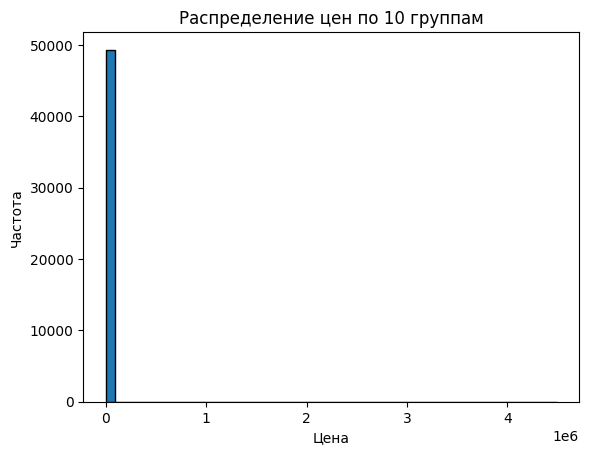

In [42]:
data_n["price"].plot.hist(bins=50, edgecolor="black")
plt.title("Распределение цен по 10 группам")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Гистограмма получается неинформативной в базовом варианте. Параметр bins определяет на сколько категорий будут делиться данные. Отсутствие наглядности на данном этапе может свидетельствовать о наличии выбросов. С помощью параметра plt.xlim(left, right) можно ограничить значения, выбросы "обрежутся", что сделает гистограмму более наглядной, но значения для отбрасывания не будут точно рассчитаны.

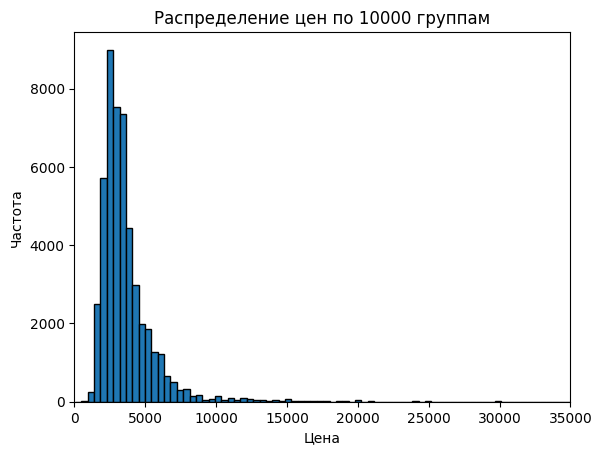

In [44]:
data_n["price"].plot.hist(bins=10000, edgecolor="black")
plt.xlim(0, 35000)
plt.title("Распределение цен по 10000 группам")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

<Axes: >

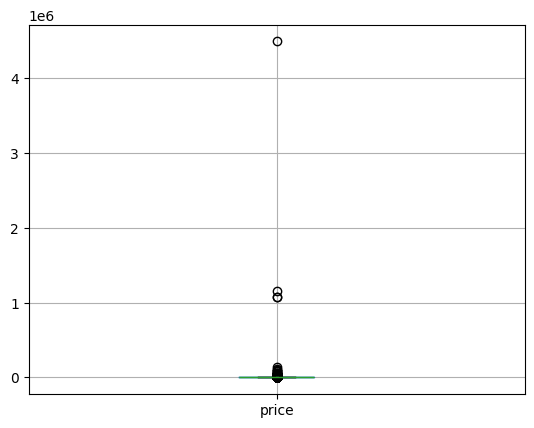

In [45]:
data_n.boxplot(column="price")

Диаграмма показывает, что в нижней группе очень высокая плотность, сверху три значения сильно выбиваются, их можно считать выбросами.

In [46]:
# 1. Находим границы отсечения по процентилям
low = data["price"].quantile(0.01)   # 1-й перцентиль
high = data["price"].quantile(0.99)  # 99-й перцентиль

print("Границы:", low, high)

# 2. Фильтруем строки
filtered_data = data_n[(data_n["price"] >= low) & (data_n["price"] <= high)].copy()

print(filtered_data.info())

Границы: 1475.0 13000.0
<class 'pandas.core.frame.DataFrame'>
Index: 48379 entries, 4 to 124009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48379 non-null  float64
 1   bedrooms        48379 non-null  int64  
 2   interest_level  48379 non-null  object 
 3   price           48379 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB
None


<Axes: ylabel='Frequency'>

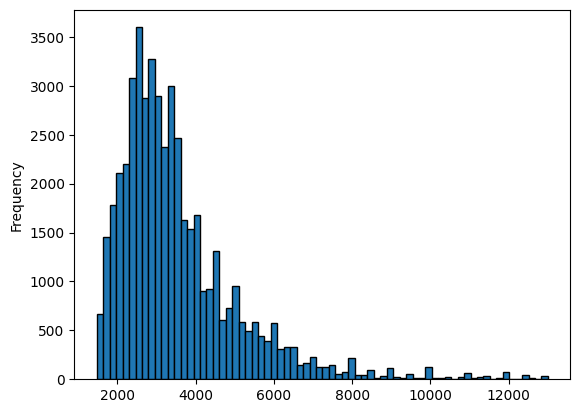

In [13]:
filtered_data["price"].plot.hist(bins=70, edgecolor="black")

После удаления выбросов, гистограмма становится информативной даже при bins=70.

### 3.2. АНАЛИЗ ХАРАКТЕРИСТИК

### Какой тип столбца 'interest_level'?

In [47]:
print(filtered_data["interest_level"].dtypes)

object


In [15]:
filtered_data["interest_level"].info()

<class 'pandas.core.series.Series'>
Index: 48379 entries, 4 to 124009
Series name: interest_level
Non-Null Count  Dtype 
--------------  ----- 
48379 non-null  object
dtypes: object(1)
memory usage: 755.9+ KB


### Выведите значения в этом столбце. Сколько записей содержит каждое значение?

In [16]:
print(filtered_data["interest_level"].unique())        # уникальные значения
print(filtered_data["interest_level"].value_counts())  # количество каждого значения

['medium' 'low' 'high']
interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64


In [17]:
mapping = {"low": 0, "medium": 1, "high": 2}
filtered_data["interest_level_encoded"] = filtered_data["interest_level"].map(mapping)
print(filtered_data["interest_level"].unique())
print(filtered_data["interest_level_encoded"].unique()) 

['medium' 'low' 'high']
[1 0 2]


### 3.4.4. Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers? <br> Построение гистограмм для объектов 'ванные комнаты', 'спальни'. Есть ли выбросы?

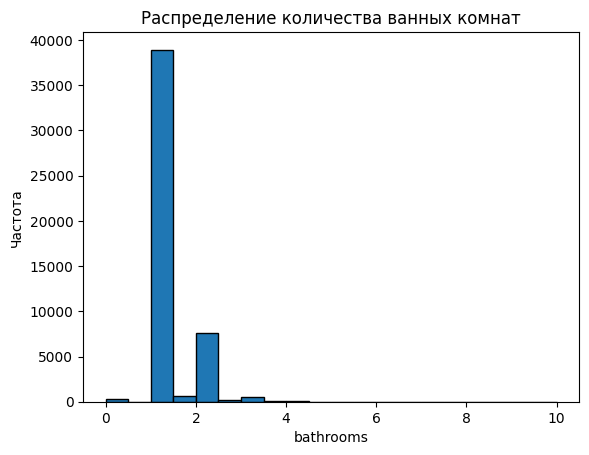

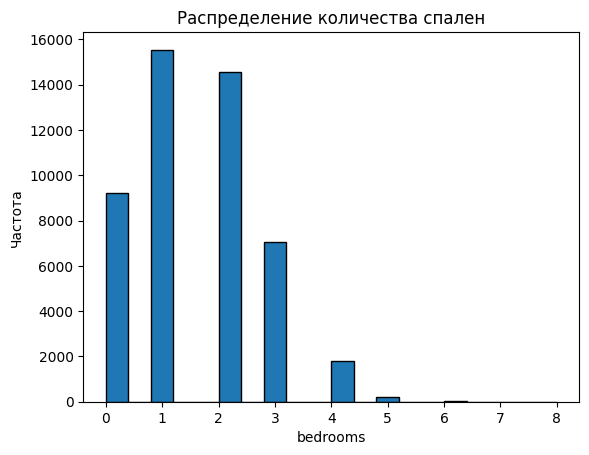

In [49]:
# Гистограмма bathrooms
filtered_data["bathrooms"].plot.hist(bins=20, edgecolor="black")
plt.title("Распределение количества ванных комнат")
plt.xlabel("bathrooms")
plt.ylabel("Частота")
plt.show()

# Гистограмма bedrooms
filtered_data["bedrooms"].plot.hist(bins=20, edgecolor="black")
plt.title("Распределение количества спален")
plt.xlabel("bedrooms")
plt.ylabel("Частота")
plt.show()

Слишком необычные значения можно считать выбросами, например, наличие в квартире 10 туалетов или 8 спален большая редкость (как в данном случае). Можно считать, что есть выбросы, если значение max сильно отличается от значения для 75% перцентиля.

In [19]:
print(filtered_data["bathrooms"].describe())
print(filtered_data["bedrooms"].describe())

count    48379.000000
mean         1.195198
std          0.456495
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: bathrooms, dtype: float64
count    48379.000000
mean         1.534633
std          1.101477
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bedrooms, dtype: float64


### 3.5. Сomplex analysis 

##### 3.5.1. Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation? <br> Постройте матрицу корреляции, чтобы понять корреляцию между объектами и целью. Построение тепловой карты для корреляционной матрицы. Есть ли корреляция?

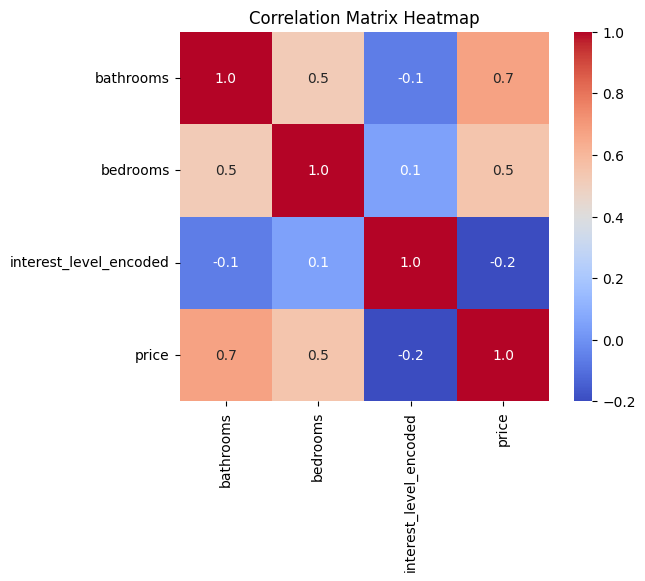

In [20]:
corr_matrix = filtered_data[['bathrooms', 'bedrooms', 'interest_level_encoded', 'price']].corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Параметры 'bathrooms', 'bedrooms' демонстрируют позитивную (прямую) зависимость, то есть чем больше ванных комнат или спален, тем выше цена.
Параметр 'interest_level_encoded' демонстрирует слабую отрицательную (обратную) зависимость, 

##### 3.5.2. Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature. <br> Постройте диаграмму рассеяния, чтобы визуализировать корреляцию между объектами и целью. Вы должны вернуть 3 графика, где ось X является целью, а ось Y - объектом.

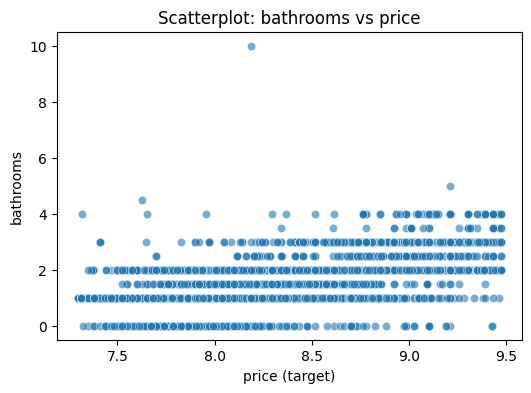

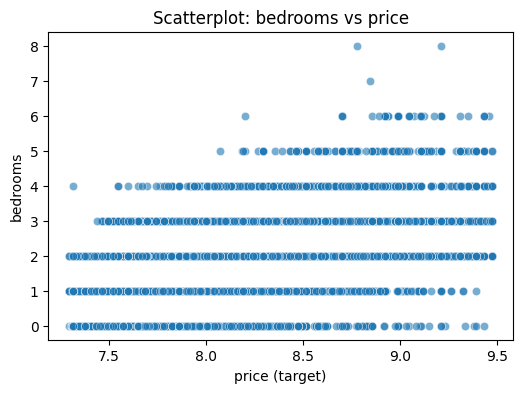

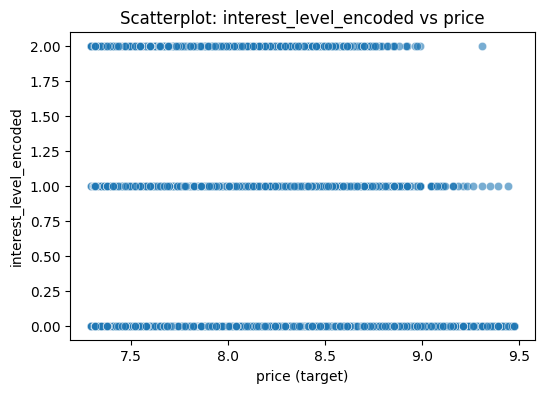

In [21]:
features = ["bathrooms", "bedrooms", "interest_level_encoded"]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=np.log1p(filtered_data["price"]), y=filtered_data[feature], alpha=0.6)
    plt.title(f"Scatterplot: {feature} vs price")
    plt.xlabel("price (target)")
    plt.ylabel(feature)
    plt.show()


# 4. Создание признаков

### 4.1. his step is very broad. You can create as many features as you want. For example, you can add 3 new features that are squared: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared'. Plot a correlation matrix with the new features. Are the new features more correlated with the target than the basic features? <br> Этот шаг очень широкий. Вы можете создать столько функций, сколько хотите. Например, вы можете добавить 3 новых объекта, которые имеют квадрат: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared'. Построение корреляционной матрицы с новыми функциями. Являются ли новые функции более коррелированными с целью, чем базовые?

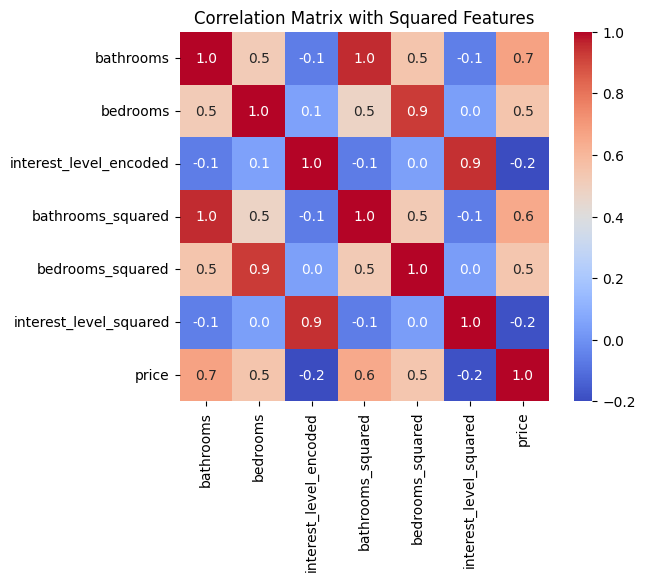

In [22]:
data_extended_features = filtered_data.copy()
# создание новых признаков, а именно квадратов для для трех наших признаков
data_extended_features["bathrooms_squared"] = data_extended_features["bathrooms"] ** 2
data_extended_features["bedrooms_squared"] = data_extended_features["bedrooms"] ** 2
data_extended_features["interest_level_squared"] = data_extended_features["interest_level_encoded"] ** 2

# Построение корреляционной матрицы с расширенными признаками
corr_matrix = data_extended_features[["bathrooms", "bedrooms", "interest_level_encoded",
                    "bathrooms_squared", "bedrooms_squared", "interest_level_squared", "price"]].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", square=True)
plt.title("Correlation Matrix with Squared Features")
plt.show()

Новые признаки не демонстрируют более сильную корреляцию по сравнению с базовыми.

### 4.2. - 4.6. Initialize PolynomialFeatures() with a degree of 10. <br> Apply PolynomialFeatures() to fit and transform your training and test data.

In [23]:
X = filtered_data[["bathrooms", "bedrooms"]]
y = filtered_data["price"]

# Разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, # test_size = 0.2 означает, что 20% данных будут использованы в качестве тестовой выборки, а 80% в качестве обучающей
    random_state=21) # фиксирует случайность, чтобы разбиение было одинаковым при повторных запусках (значение предложено в задании)

# Инициализация с 10-й степенью
poly = PolynomialFeatures(degree=10)

# Преобразование данных
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Размерность исходных данных:", X_train.shape)
print("Размерность после PolynomialFeatures:", X_train_poly.shape)
print("Размерность исходных данных:", X_test.shape)
print("Размерность после PolynomialFeatures:", X_test_poly.shape)



Размерность исходных данных: (33865, 2)
Размерность после PolynomialFeatures: (33865, 66)
Размерность исходных данных: (14514, 2)
Размерность после PolynomialFeatures: (14514, 66)


# 5. Now you need to train 3 models: linear regression, decision tree and naive model. We will use them as black boxes without deep understanding. <br> Теперь нужно обучить 3 модели: линейную регрессию, дерево решений и наивную модель. Мы будем использовать их как черные ящики без глубокого понимания.

### 5.1. Results table <br> 
Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models. <br> 
Создадим два пустых кадра данных Pandas со столбцами 'model', 'train', 'test'. Назовем первый result_MAE, а второй result_RMSE. Мы будем заполнять эти таблицы результатами работы моделей.

In [24]:
# Пустые таблицы для результатов
result_MAE = pd.DataFrame(columns=["model", "train", "test"])
result_RMSE = pd.DataFrame(columns=["model", "train", "test"])

### 5.2. Linear Regression

5.2.1. Initialize linear regression from sklearn with no parameters.

In [25]:
# Пустые таблицы для результатов
result_MAE = pd.DataFrame(columns=["model", "train", "test"])
result_RMSE = pd.DataFrame(columns=["model", "train", "test"])

5.2.2. Fit your model and make predictions on training and test features. Save it as new columns in data.

In [26]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

5.2.3. Compute MAE (Mean Absolute Error) on training and test targets.

In [27]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

5.2.4. Calculate RMSE (Root Mean Square Error) on training and test objectives.

In [28]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)

5.2.5 Insert your metrics into tables result_MAE and result_RMSE with model name 'linear_regression'.

In [29]:
# Запись в таблицы
result_MAE.loc[len(result_MAE)] = ["linear_regression", mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ["linear_regression", rmse_train, rmse_test]

### 5.3. Decision Tree

5.3.1. Initialize decision tree regressor from sklearn with fixed random_state=21.

In [30]:
tree = DecisionTreeRegressor(random_state=21)
tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


5.3.2. Fit it to train features and train target and make prediction on train and test features. Save it as a new column in data.

In [31]:
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

5.3.3. Compute MAE (Mean Absolute Error) on train and test targets.

In [32]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

5.3.4. Compute RMSE (Root Mean Square Error) on train and test targets.

In [33]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)

5.3.5. Insert your metrics into tables result_MAE and result_RMSE with model name 'decision_tree'.

In [34]:
result_MAE.loc[len(result_MAE)] = ["decision_tree", mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ["decision_tree", rmse_train, rmse_test]

### 5.4. Naive Models

5.4.1. Calculate the mean and median of 'price' on the training and test data and create a column with these values.

In [35]:
# Среднее
mean_train = np.mean(y_train)
mean_test = np.mean(y_test)

y_pred_train = np.full_like(y_train, mean_train, dtype=float)
y_pred_test = np.full_like(y_test, mean_train, dtype=float)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)

result_MAE.loc[len(result_MAE)] = ["naive_mean", mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ["naive_mean", rmse_train, rmse_test]

# Медиана
median_train = np.median(y_train)
median_test = np.median(y_test)

y_pred_train = np.full_like(y_train, median_train, dtype=float)
y_pred_test = np.full_like(y_test, median_test, dtype=float)

5.4.2. Calculate the MAE on the training and test targets between your target and the calculated mean and median.

In [36]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

5.4.3. Calculate the RMSE on the training and test targets between your target and the calculated mean and median.

In [37]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)

5.4.4. Insert your metrics into tables result_MAE and result_RMSE with model names 'naive_mean' and 'naive_median'.

In [38]:
result_MAE.loc[len(result_MAE)] = ["naive_median", mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ["naive_median", rmse_train, rmse_test]

# 5. Сравнение результатов

In [39]:
pd.options.display.float_format = '{:,.0f}'.format  # целые с разделением тысяч
result_MAE.sort_values(by="test", inplace=True)
result_MAE = result_MAE.sort_values(by="test").reset_index(drop=True)
print("MAE results:")
print(result_MAE)

result_RMSE.sort_values(by="test", inplace=True)
result_RMSE = result_RMSE.sort_values(by="test").reset_index(drop=True)
print("\nRMSE results:")
print(result_RMSE)

MAE results:
               model  train  test
0      decision_tree    755   759
1  linear_regression    785   784
2       naive_median  1,088 1,083
3         naive_mean  1,140 1,141

RMSE results:
               model     train      test
0      decision_tree 1,153,387 1,184,894
1  linear_regression 1,267,224 1,253,509
2         naive_mean 2,547,907 2,563,176
3       naive_median 2,701,741 2,726,478


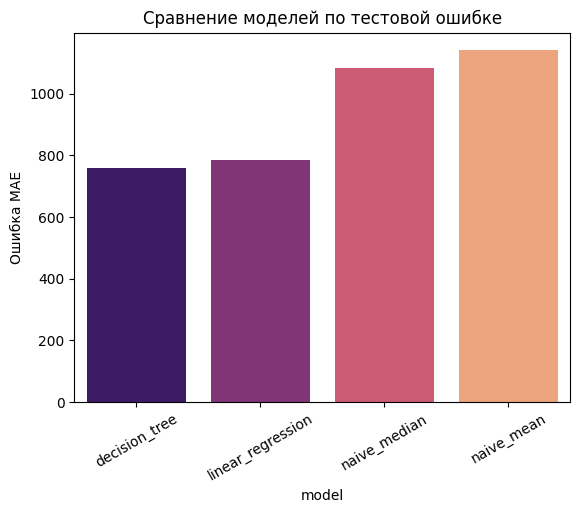

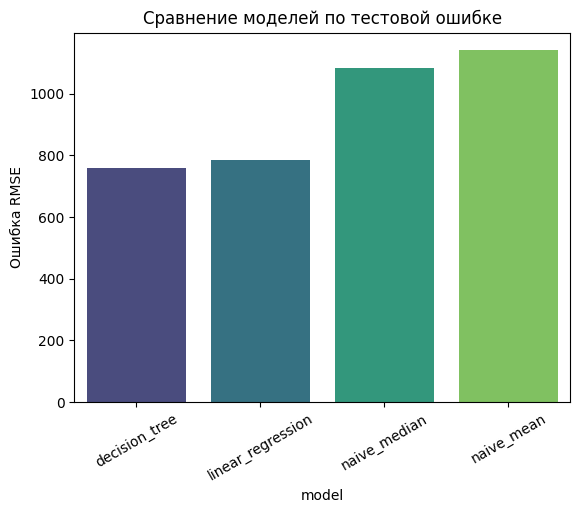

In [40]:
sns.barplot(data=result_MAE, x="model", y="test", hue="model", palette="magma", legend=False)
plt.title("Сравнение моделей по тестовой ошибке")
plt.ylabel("Ошибка MAE")
plt.xticks(rotation=30)
plt.show()

sns.barplot(data=result_MAE, x="model", y="test", hue="model", palette="viridis", legend=False)
plt.title("Сравнение моделей по тестовой ошибке")
plt.ylabel("Ошибка RMSE")
plt.xticks(rotation=30)
plt.show()

Лучшая модель по результатам сравнения для MAE и RMSE: desicion_tree, далее с небольшим отрывом идет линейная регрессия.